# **Importing Libraries**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

import pickle

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [35]:
df = pd.read_csv('power.csv')
df.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01-01-2017 00:00        6.559      73.8      0.083                0.051   
1  01-01-2017 00:10        6.414      74.5      0.083                0.070   
2  01-01-2017 00:20        6.313      74.5      0.080                0.062   
3  01-01-2017 00:30        6.121      75.0      0.083                0.091   
4  01-01-2017 00:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption  
0         0.119       34055.69620  
1         0.085       29814.68354  
2         0.100       29128.10127  
3         0.096       28228.86076  
4         0.085       27335.69620

In [3]:
df.tail()

Datetime  Temperature  Humidity  WindSpeed  \
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption  
52411                0.040         0.096       31160.45627  
52412                0.051         0.093       30430.41825  
52413                0.084         0.074       29590.87452  
52414                0.066         0.089       28958.17490  
52415                0.062         0.111       28349.80989

## We can see that the data is of 1 year with time interval of 10 mins

In [4]:
df.sample(10)

Datetime  Temperature  Humidity  WindSpeed  \
44120  11-03-2017 09:20        15.33     84.60      0.084   
45418  11-12-2017 09:40        14.09     82.30      0.086   
14932   4/14/2017 16:40        18.12     69.93      0.074   
50243  12/15/2017 21:50        14.26     78.80      0.082   
2157    1/15/2017 23:30        16.07     57.14      0.082   
22414  06-05-2017 15:40        22.10     78.10      0.065   
12524   3/28/2017 23:20        18.02     53.75      4.921   
43364   10/29/2017 3:20        15.67     84.10      4.916   
46812   11/22/2017 2:00        10.92     68.10      0.080   
14744    4/13/2017 9:20        15.67     87.20      0.071   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption  
44120              301.400       240.900       27550.76923  
45418              256.200        65.050       23809.23077  
14932               94.100        83.700       32414.72551  
50243                0.040         0.115       35352.09125  
2157                 0.099         0.089       31345.82278  
22414              159.500       128.100       35348.34437  
12524                0.033         0.119       28910.29787  
43364                0.048         0.115       23273.17287  
46812                0.048         0.096       22307.69231  
14744               47.050        40.100       30201.24865

From the above sample we can observe that there is difference in format of datetime in some columns

# **Perform Basic EDA**

In [5]:
df.shape

(52416, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             52416 non-null  object 
 1   Temperature          52416 non-null  float64
 2   Humidity             52416 non-null  float64
 3   WindSpeed            52416 non-null  float64
 4   GeneralDiffuseFlows  52416 non-null  float64
 5   DiffuseFlows         52416 non-null  float64
 6   PowerConsumption     52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


Datetime is object string so we have to convert it into datetime type

In [7]:
df.describe()

Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption  
count  52416.000000      52416.000000  
mean      75.028022      32344.970564  
std      124.210949       7130.562564  
min        0.011000      13895.696200  
25%        0.122000      26310.668692  
50%        4.456000      32265.920340  
75%      101.000000      37309.018185  
max      936.000000      52204.395120

In [8]:
df.isnull().sum()

Datetime               0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

No Missing Values Present

In [9]:
df.duplicated().sum()

np.int64(0)

No duplicate values are present

In [10]:
val1 = df.iloc[10]
print(val1)

Datetime               01-01-2017 01:40
Temperature                       5.516
Humidity                           77.5
WindSpeed                         0.081
GeneralDiffuseFlows               0.051
DiffuseFlows                      0.108
PowerConsumption            23896.70886
Name: 10, dtype: object


In [11]:
val2 = df.iloc[1728]
print(val2)

Datetime               1/13/2017 0:00
Temperature                     15.18
Humidity                         83.6
WindSpeed                       0.079
GeneralDiffuseFlows             0.048
DiffuseFlows                    0.148
PowerConsumption          29401.51899
Name: 1728, dtype: object


We can see that there is difference in format of datetime in some columns

### Convert all MM/DD/YYYY format into MM-DD-YYYY

In [36]:
df['Datetime'] = df['Datetime'].astype(str).str.replace('/', '-', regex=False)

There are some format difference in datetime so before converting it into datetime type from string we have to convert the whole column in same format to avoid anomalies

In [37]:
# Convert 'Datetime' to datetime type safely
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Drop invalid datetime rows
df = df.dropna(subset=['Datetime'])

# Sort by time (important for time series)
df = df.sort_values('Datetime')

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Create minimal, useful time features
df['time_fraction'] = df.index.hour + df.index.minute / 60.0
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month


This code converts the 'Datetime' column to datetime objects using the format day-month-year

In [14]:
print(df.info())
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          52416 non-null  float64
 1   Humidity             52416 non-null  float64
 2   WindSpeed            52416 non-null  float64
 3   GeneralDiffuseFlows  52416 non-null  float64
 4   DiffuseFlows         52416 non-null  float64
 5   PowerConsumption     52416 non-null  float64
 6   time_fraction        52416 non-null  float64
 7   dayofweek            52416 non-null  int32  
 8   month                52416 non-null  int32  
dtypes: float64(7), int32(2)
memory usage: 3.6 MB
None
                     Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-10-10 02:40:00        20.16     85.00      0.079                0.066   
2017-12-05 19:30:0

#### Datetime yyyy-mm-dd is set as index and converted to datetime type

In [15]:
df.shape

(52416, 9)

All the data is preserved

# **Univariate Analysis**

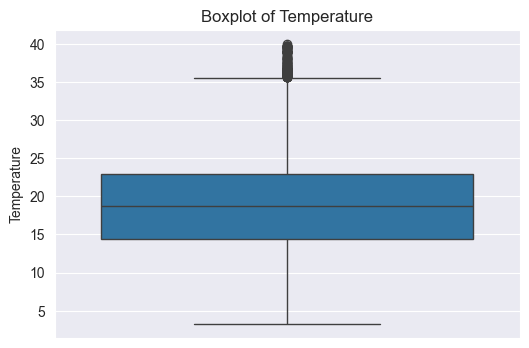

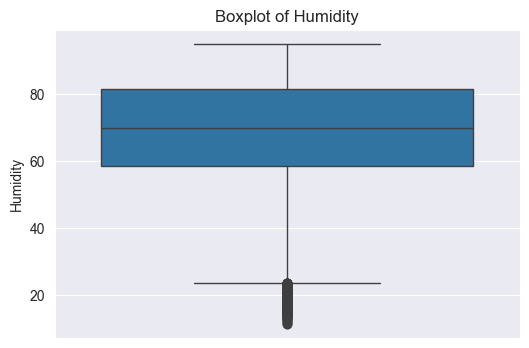

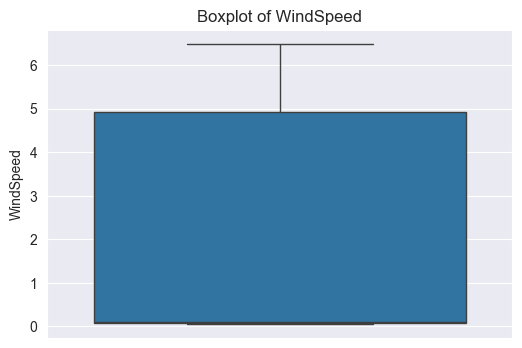

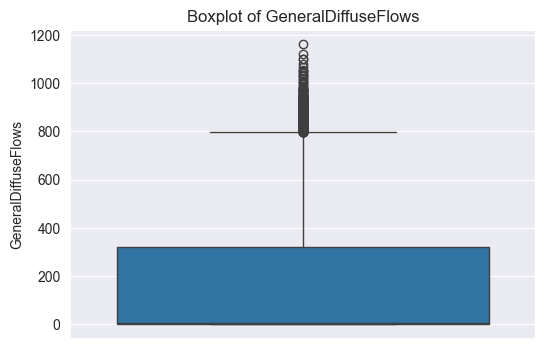

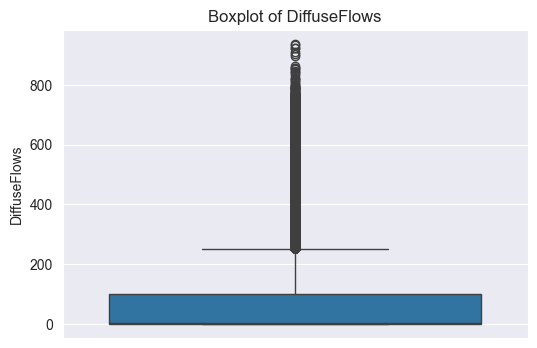

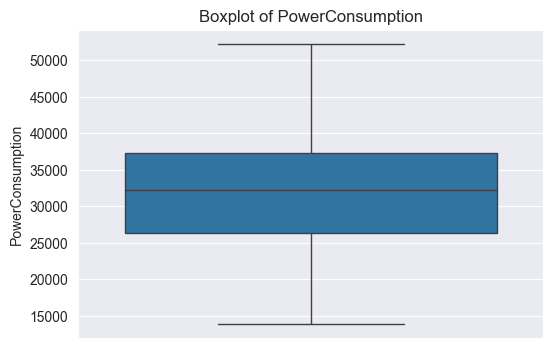

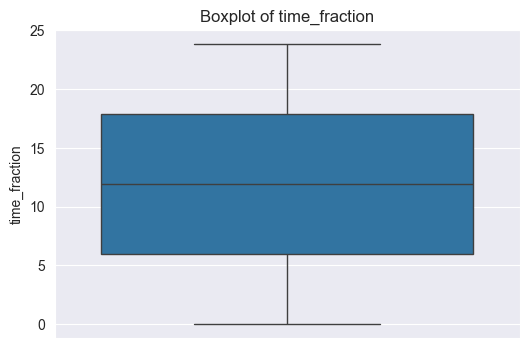

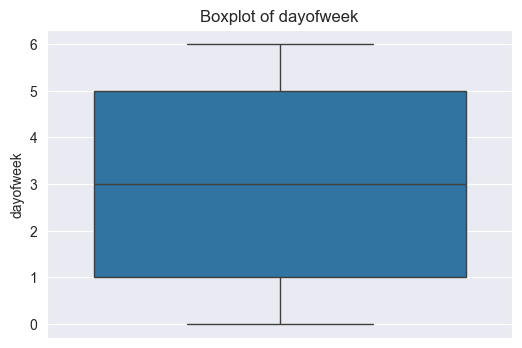

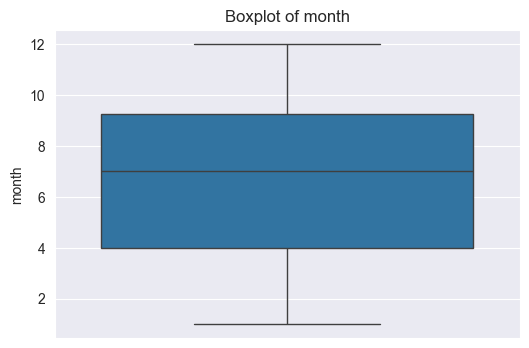

In [16]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

From the boxplots generated for the dataset, we can observe that there are outliers present in the  **Temperature, Humidity, Diffuse Flows, and General Diffuse Flows** columns.So first we have to handle outliers before training the model

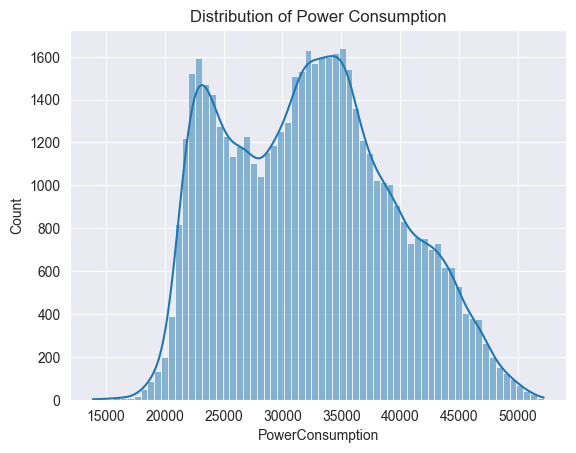

In [17]:
sns.histplot(df['PowerConsumption'], kde=True)
plt.title('Distribution of Power Consumption')
plt.show()

The distribution appears right-skewed, with more data concentrated around 25,000–35,000 units
There are fewer high consumption values above 45,000, which are less frequent.
Peaks indicate common ranges of power consumption.

We can make use of Random Forest Regressor which are less sensitive to skewness

# **Outliers Handling**

In [38]:
def IQR(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower if x < lower else (upper if x > upper else x))

    return df[column]

In [39]:
IQR(df,'Temperature')
IQR(df,'Humidity')
IQR(df,'GeneralDiffuseFlows')
IQR(df,'DiffuseFlows')

Datetime
2017-01-01 00:00:00    0.119
2017-01-01 00:10:00    0.085
2017-01-01 00:20:00    0.100
2017-01-01 00:30:00    0.096
2017-01-01 00:40:00    0.085
                       ...  
2017-12-30 23:10:00    0.096
2017-12-30 23:20:00    0.093
2017-12-30 23:30:00    0.074
2017-12-30 23:40:00    0.089
2017-12-30 23:50:00    0.111
Name: DiffuseFlows, Length: 52416, dtype: float64

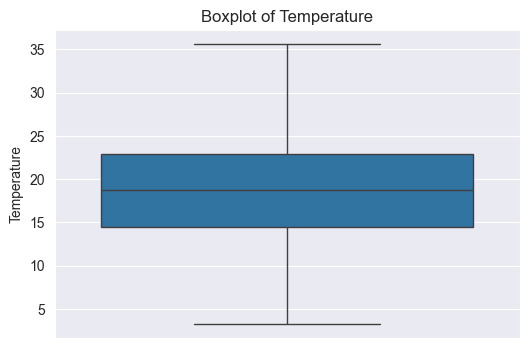

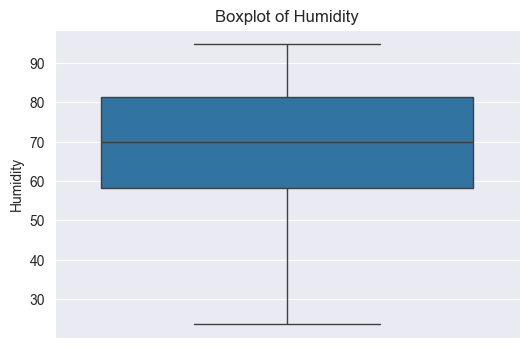

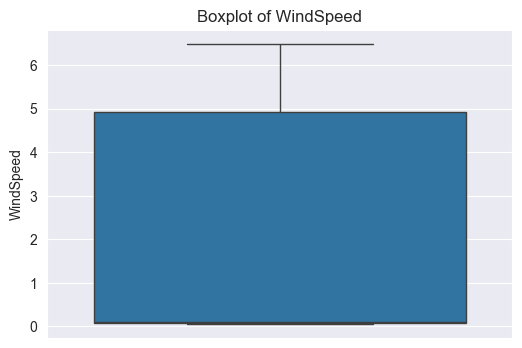

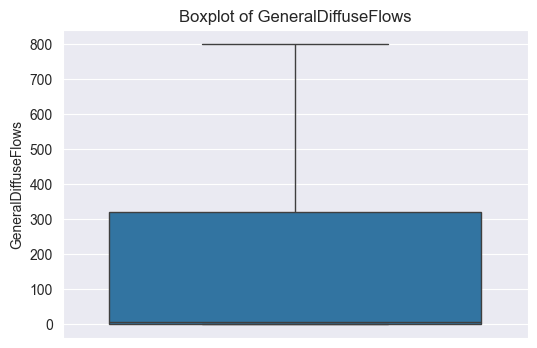

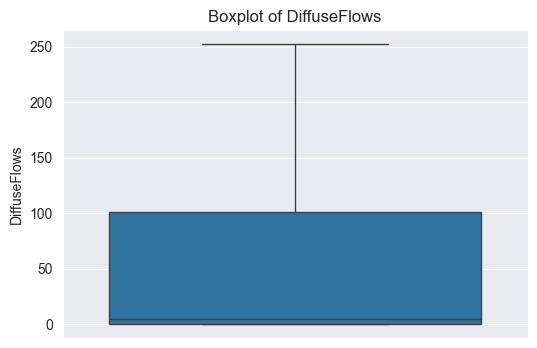

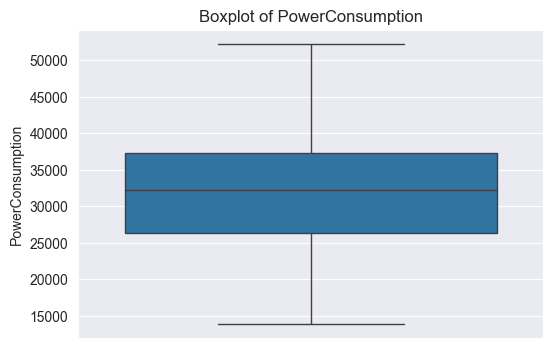

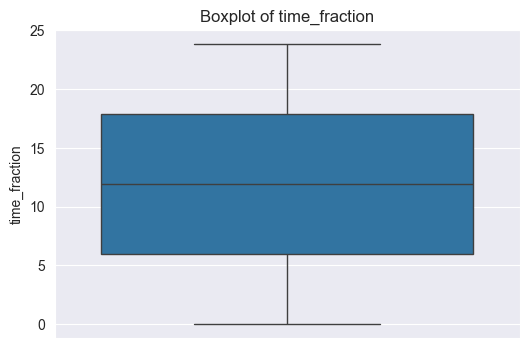

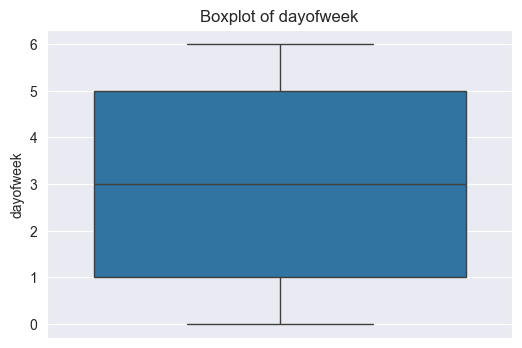

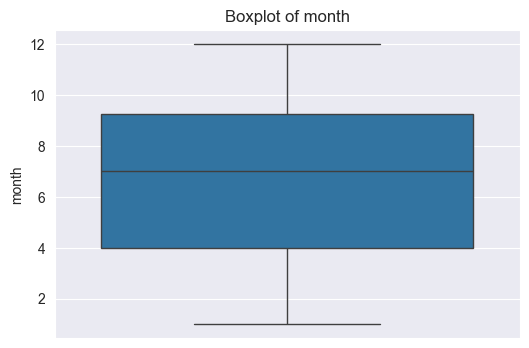

In [18]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# **Bivariate Analysis**

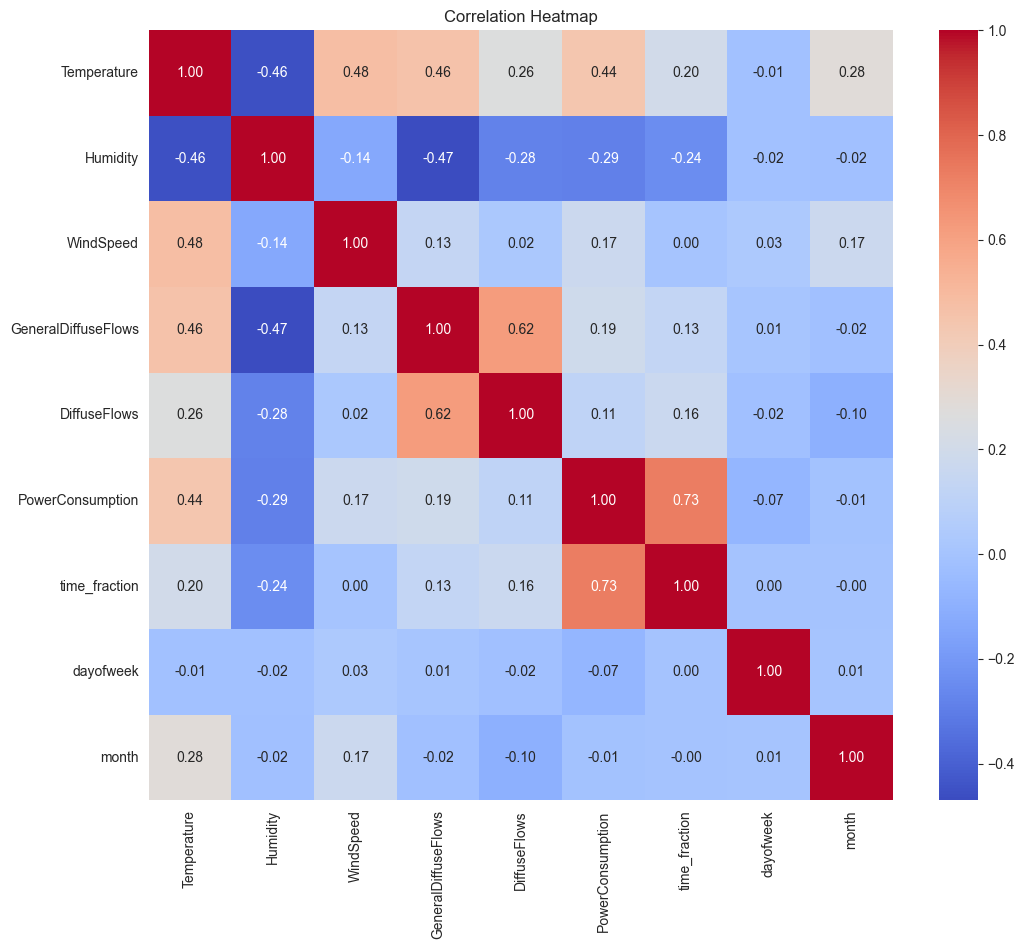

In [199]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **From the above HeatMap we can observe that the columns such as Humidity, DayofWeek , Month does not add to Power Consumption Therefore we simply can remove those columns**

#### So We can drop the unnecessary column to reduce dimensionality

In [40]:
df = df.drop(['Humidity', 'month', 'dayofweek'], axis=1)

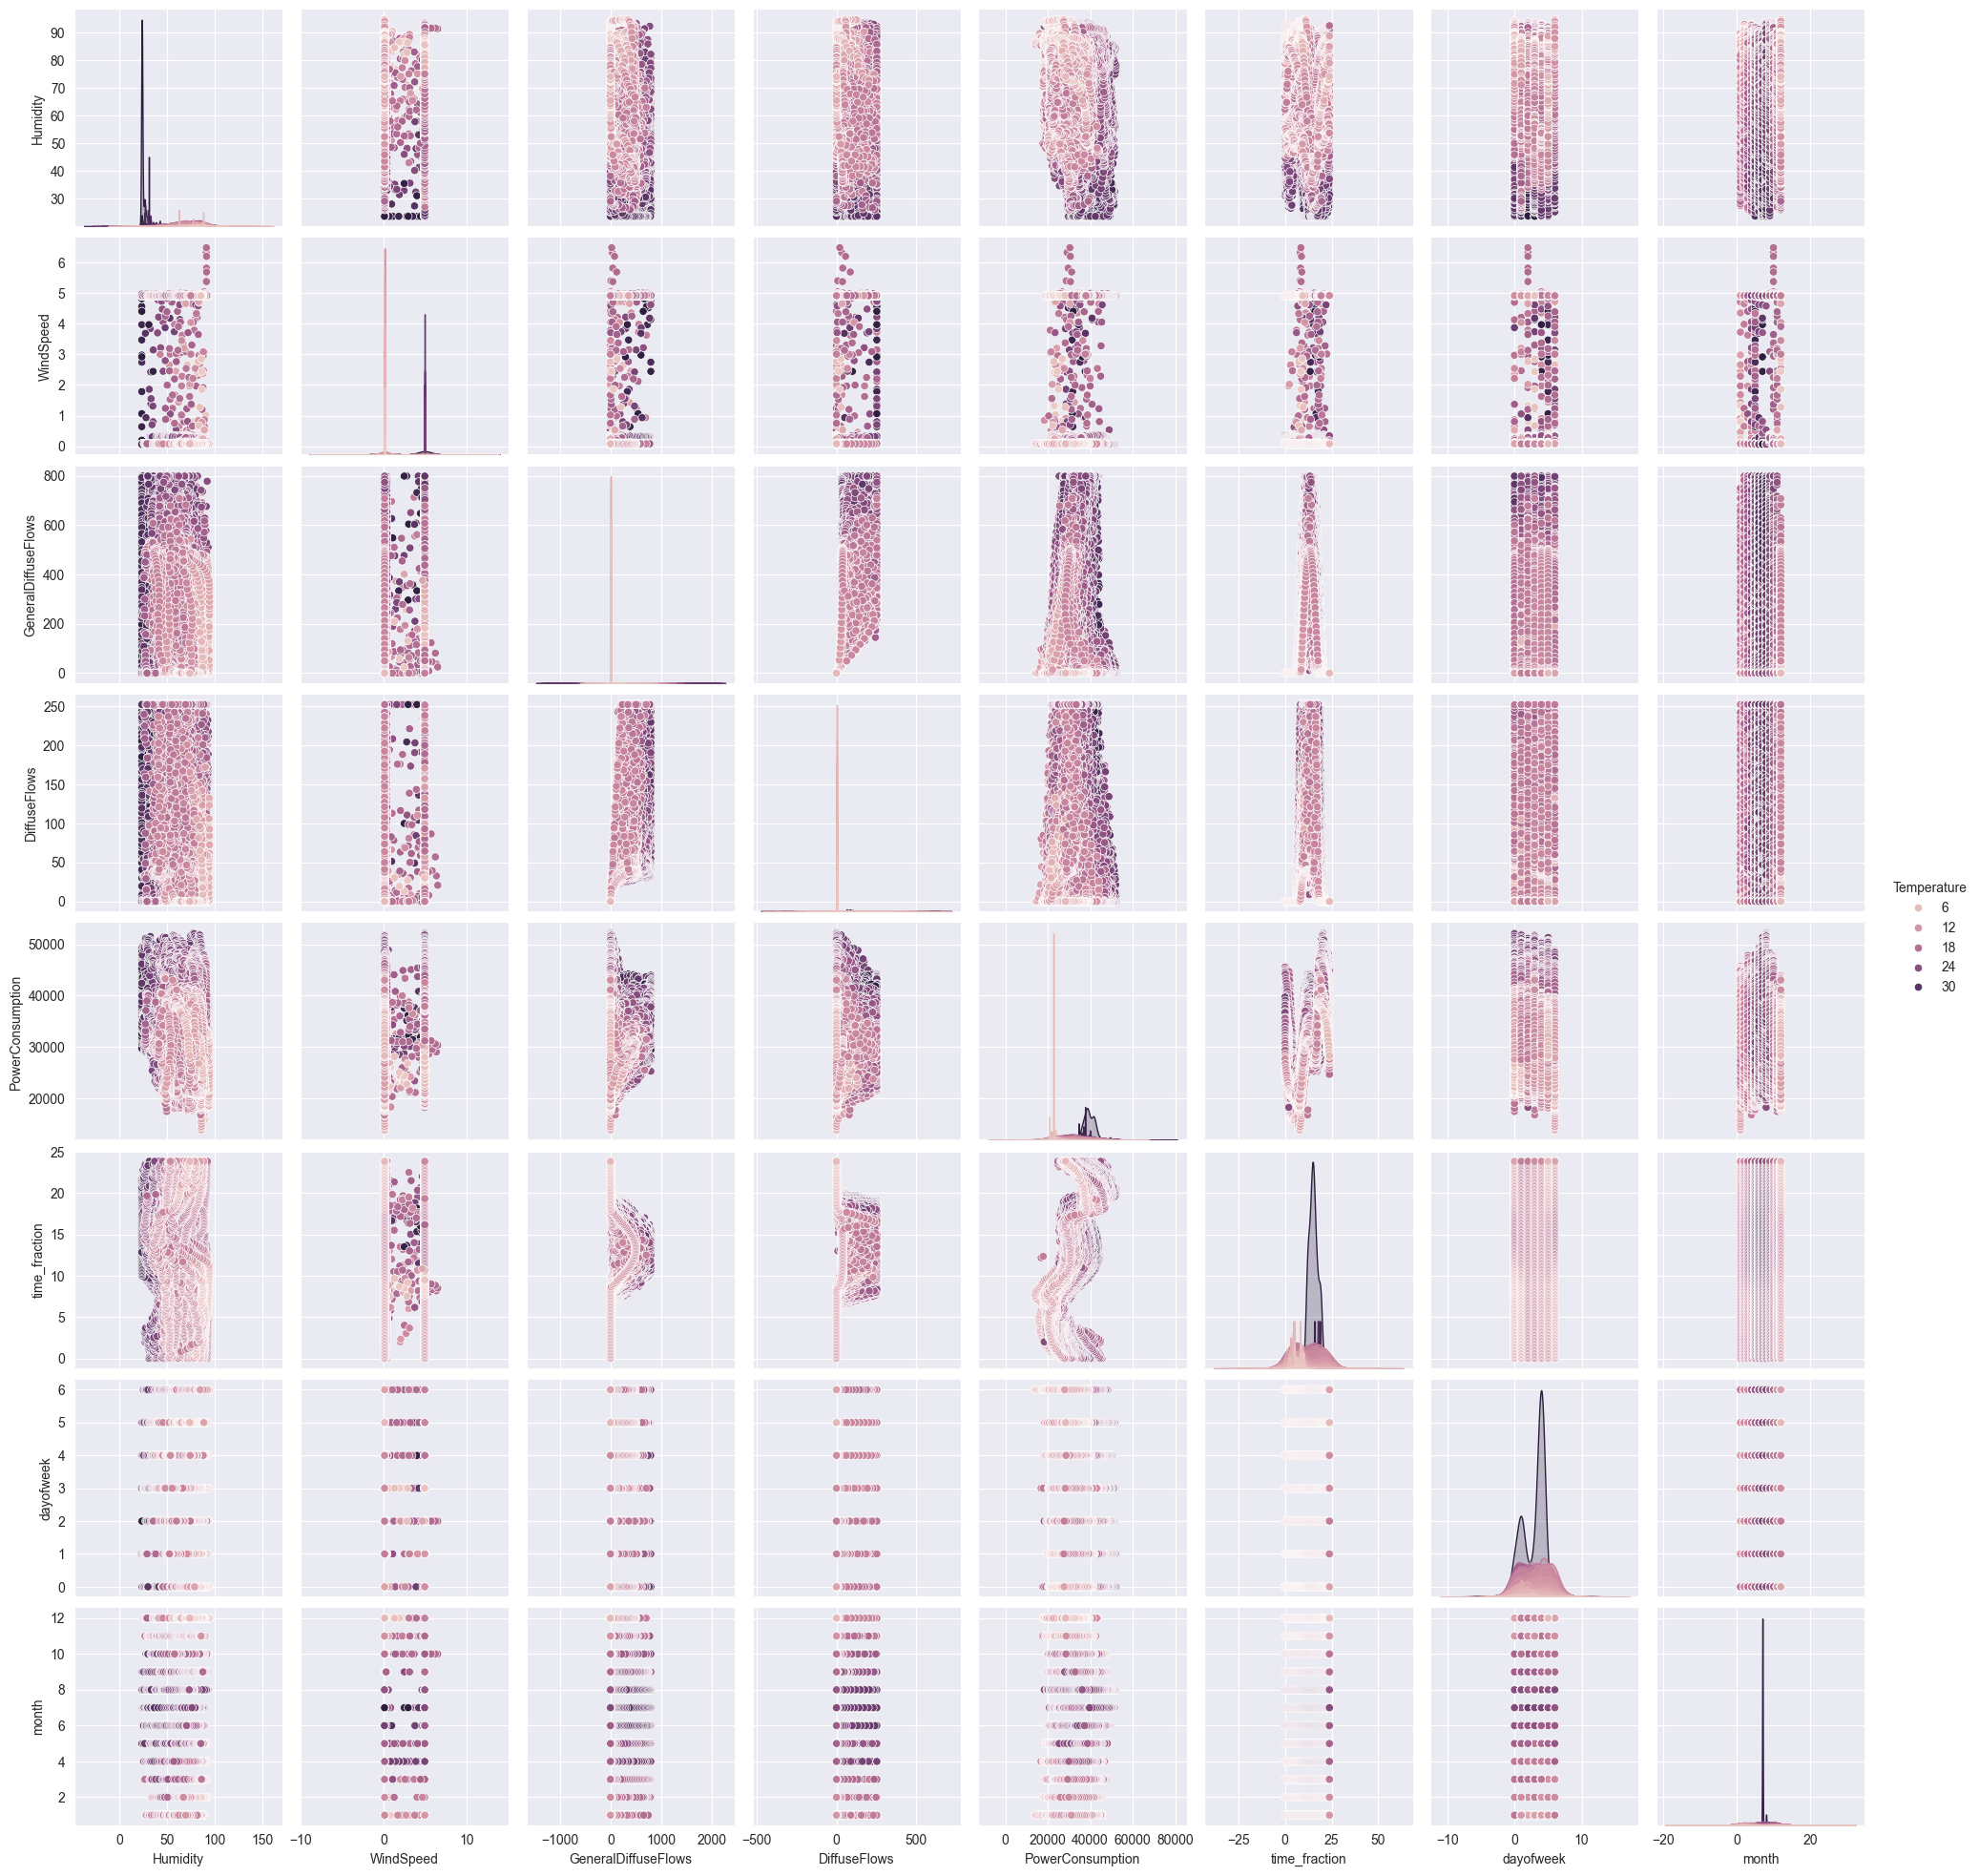

In [200]:
sns.pairplot(df,hue = 'Temperature')

# **Declaring Feature and Target Selection**

#### **Delcaring dependent and independent variable**

In [41]:
X = df.drop('PowerConsumption', axis=1)
y = df['PowerConsumption']

### **Splitting data into training and testing sets**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (41932, 5)
Shape of X_test: (10484, 5)
Shape of y_train: (41932,)
Shape of y_test: (10484,)


#### Scaling

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling is needed for models like Linear Regression, Ridge Regression, Lasso Regression, KNeighborsRegressor

# **Model Training**

**Initialize and train the model**

# Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
lrPredict = lr.predict(X_test_scaled)
lrMse = mean_squared_error(y_test, lrPredict)
lrR2 = r2_score(y_test, lrPredict)
print(f"Mean Squared Error: {lrMse}")
print(f"R 2 Score: {lrR2}")

Mean Squared Error: 18662473.402972
R 2 Score: 0.6304049869418044


# Ridge And Lasso

In [59]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [60]:
y_pred = ridge.predict(X_test_scaled)
print("Ridge Regression -> MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression -> R2:", r2_score(y_test, y_pred))

Ridge Regression -> MSE: 18662458.683670893
Ridge Regression -> R2: 0.630405278445517


In [61]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [62]:
y_pred = lasso.predict(X_test_scaled)
print("Lasso Regression -> MSE:", mean_squared_error(y_test, y_pred))
print("Lasso Regression -> R2:", r2_score(y_test, y_pred))

Lasso Regression -> MSE: 18662431.425994016
Lasso Regression -> R2: 0.6304058182615009


# Decision Tree Regressor

In [63]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
y_pred = dt.predict(X_test)
print("Decision Tree -> MSE:", mean_squared_error(y_test, y_pred))
print("Decision Tree -> R2:", r2_score(y_test, y_pred))

Decision Tree -> MSE: 8268697.368258021
Decision Tree -> R2: 0.8362452154220399


# KNN Regressor

In [67]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [66]:
y_pred = knn.predict(X_test_scaled)

print("KNN Regressor -> MSE:", mean_squared_error(y_test, y_pred))
print("KNN Regressor -> R² Score:", r2_score(y_test, y_pred))

KNN Regressor -> MSE: 5857763.4180441005
KNN Regressor -> R² Score: 0.8839917892856016


# XG Boost Regressor

In [70]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred = xgbr.predict(X_test)
print("XGBoost -> MSE:", mean_squared_error(y_test, y_pred))
print("XGBoost -> R2:", r2_score(y_test, y_pred))

XGBoost -> MSE: 4719146.553035022
XGBoost -> R2: 0.9065411644945863


# With Random Forest Regressor

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


**Make predictions**

In [72]:
y_pred = model.predict(X_test)

**Evaluate the model**

In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R 2 Score: {r2}")

Mean Squared Error: 4107155.421002968
R 2 Score: 0.9186611480332563


In [75]:
# Store trained models and their names
models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "Decision Tree": dt,
    "KNeighborsRegressor": knn,
    "Random Forest": model,
    "XGBoost": xgbr
}

results = {}

# Evaluate all trained models
for name, m in models.items():
    y_pred = m.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} -> MSE: {mse:.3f}, R²: {r2:.3f}")

# Select the best one
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with R² = {results[best_model_name]:.3f}")


Linear Regression -> MSE: 7114884525.915, R²: -139.904
Ridge Regression -> MSE: 7114784500.043, R²: -139.902
Lasso Regression -> MSE: 7111661818.617, R²: -139.841
Decision Tree -> MSE: 8268697.368, R²: 0.836
KNeighborsRegressor -> MSE: 144004123.211, R²: -1.852
Random Forest -> MSE: 4107155.421, R²: 0.919
XGBoost -> MSE: 4719146.553, R²: 0.907

Best Model: Random Forest with R² = 0.919


### **From all the models we can see that Random Forest Regressor is giving maximum accuracy so we will use this model**

# **Hyperparameter Tuning**

In [121]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


**Model Evaluation**

In [25]:
print("R-squared:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

R-squared: 0.9191979339772738
MAE: 1406.7191719747036
RMSE: 2019.9135486769267


The accuracy is increased slightly

# Making Pickle File of the model

In [151]:
Pkl_Filename = "model.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_model, file)

In [152]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_Model = pickle.load(file)

In [153]:
pred = Pickled_Model.predict(X_test)
pred

array([32988.96772876, 34452.08329746, 29177.50208928, ...,
       41235.52679126, 28412.34334776, 36167.11923304])